**UNDERSTANDING THE DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Luminar/Restaurant_revenue (1).csv')

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
df.corr(numeric_only=True)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
Number_of_Customers,1.000000,0.033470,-0.007024,-0.013898,0.058693,-0.010140,0.745239
Menu_Price,0.033470,1.000000,0.016319,0.020808,0.022068,0.003792,0.259579
Marketing_Spend,-0.007024,0.016319,1.000000,-0.058586,-0.041838,-0.031470,0.269929
Average_Customer_Spending,-0.013898,0.020808,-0.058586,1.000000,0.006620,0.054163,-0.035665
Promotions,0.058693,0.022068,-0.041838,0.006620,1.000000,-0.021635,0.014869
Reviews,-0.010140,0.003792,-0.031470,0.054163,-0.021635,1.000000,-0.024946
Monthly_Revenue,0.745239,0.259579,0.269929,-0.035665,0.014869,-0.024946,1.000000


**DATA CLEANING**

In [ ]:
df.isna().sum()

,0
Number_of_Customers,0
Menu_Price,0
Marketing_Spend,0
Cuisine_Type,0
Average_Customer_Spending,0
Promotions,0
Reviews,0
Monthly_Revenue,0


In [ ]:
df.duplicated().sum()

0

**HEAT MAP**

<Axes: >

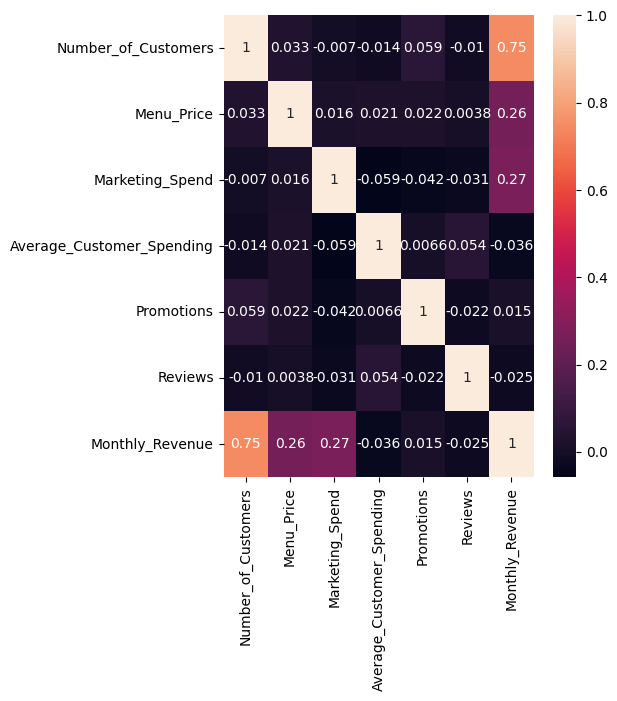

In [ ]:
plt.figure(figsize=(5,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

**ONE HOT**

In [ ]:
df['Cuisine_Type'].value_counts()

,count
Cuisine_Type,
Japanese,262
American,256
Mexican,250
Italian,232


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False,drop='first')
result=onehot.fit_transform(df[['Cuisine_Type']])

In [ ]:
onehot.get_feature_names_out()

array(['Cuisine_Type_Italian', 'Cuisine_Type_Japanese',
       'Cuisine_Type_Mexican'], dtype=object)

In [ ]:
result=pd.DataFrame(result,columns=onehot.get_feature_names_out())

In [ ]:
df=df.drop(columns='Cuisine_Type')

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df=df.join(result)

In [ ]:
x=df.drop(columns=['Monthly_Revenue'])
y=df['Monthly_Revenue']

In [ ]:
x

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Cuisine_Type_Italian,Cuisine_Type_Japanese,Cuisine_Type_Mexican
0,61,43.117635,12.663793,36.236133,0,45,0.0,1.0,0.0
1,24,40.020077,4.577892,17.952562,0,36,1.0,0.0,0.0
2,81,41.981485,4.652911,22.600420,1,91,0.0,1.0,0.0
3,70,43.005307,4.416053,18.984098,1,59,1.0,0.0,0.0
4,30,17.456199,3.475052,12.766143,1,30,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,0.0,1.0,0.0
996,31,20.615496,5.822885,17.040990,0,57,0.0,0.0,1.0
997,69,17.110656,4.141898,44.649315,0,55,0.0,1.0,0.0
998,73,37.664722,3.046556,27.767358,0,23,0.0,1.0,0.0


In [ ]:
y

,Monthly_Revenue
0,350.912040
1,221.319091
2,326.529763
3,348.190573
4,185.009121
...,...
995,249.312034
996,110.228767
997,312.212552
998,272.482204


**LINEAR REGRESSION**

In [ ]:
#There are multiple columns so multiple linear regression is done
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=400)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=linear_model.predict(x_test)

In [ ]:
m=linear_model.coef_
c=linear_model.intercept_
m,c

(array([ 2.82241311,  1.98577455,  4.84958815, -0.29508148, -1.88823949,
        -0.00907554, -4.52238886, -3.87618929,  1.95465502]),
 21.667842792558503)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error
print(f'R2:{r2_score(y_test,y_pred)}')
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')
print(f'MSE:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE:{root_mean_squared_error(y_test,y_pred)}')
print(f'MAPE:{mean_absolute_percentage_error(y_test,y_pred)*100}')

R2:0.7203867532417917
MAE:47.099864498844894
MSE:3500.28196244115
RMSE:59.16318080057182
MAPE:36.584233227304544


In [ ]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Type_Italian,Cuisine_Type_Japanese,Cuisine_Type_Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0.0,1.0,0.0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1.0,0.0,0.0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0.0,1.0,0.0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1.0,0.0,0.0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,249.312034,0.0,1.0,0.0
996,31,20.615496,5.822885,17.040990,0,57,110.228767,0.0,0.0,1.0
997,69,17.110656,4.141898,44.649315,0,55,312.212552,0.0,1.0,0.0
998,73,37.664722,3.046556,27.767358,0,23,272.482204,0.0,1.0,0.0


In [ ]:
df3=pd.read_csv('/content/drive/MyDrive/Luminar/Restaurant_revenue (1).csv')
df3['Cuisine_Type'].unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [ ]:
def price_predict():
  print('Restraunt Revenue predictor')
  customers=int(input('enter no of customers:'))
  Menu=float(input('enter no of Menu Price:'))
  Marketing=float(input('enter the marketing spend:'))
  spending=float(input('enter the average customer spending:'))
  promotions=input('Is there promotions Yes/No :')
  if promotions.lower()=='yes':
    promotions=1
  elif promotions.lower()=='no':
    promotions=0
  else:
    print('invalid entry')
  Cuisine_Type=df3['Cuisine_Type'].unique()
  print(f"Available Cuisine Types: {Cuisine_Type}")
  selected_cuisine = input('Enter the cuisine type: ').strip()
  dict1={'Excellent':100,'Good':90,'Average':80, 'Below average':70, 'Poor':60}
  rating=input(f'rate the restraunt.\n {dict1.keys()}:')
  view=dict1[view.capitalize()]
  one_res=onehot.transform([[selected_cuisine]])
  x1=np.array([[customers,Menu,Marketing,spending,promotions,view]])
  new=np.hstack([x1,one_res])
  predict=linear_model.predict(new)
  print(predict[0])

In [ ]:
# price_predict()

In [ ]:
dict2={'model':linear_model,'onehot':onehot,'Cusine':df3['Cuisine_Type'].unique()}

In [ ]:
dict2

{'model': LinearRegression(),
 'onehot': OneHotEncoder(drop='first', sparse_output=False),
 'Cusine': array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)}

In [ ]:
#pickle
import pickle #build in module
with open('model.pkl','wb') as obj1:
  pickle.dump(dict2,obj1)

In [ ]:
with open('model.pkl','rb') as obj2:
  a=pickle.load(obj2)

In [ ]:
a

{'model': LinearRegression(),
 'onehot': OneHotEncoder(drop='first', sparse_output=False),
 'Cusine': array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)}

**POLYNOMIAL REGRESSION**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
x_train_pol=poly.fit_transform(x_train)
x_test_pol=poly.transform(x_test)

In [ ]:
x_train_pol.shape

(700, 55)

In [ ]:
from sklearn.linear_model import LinearRegression
poly_model=LinearRegression()
poly_model.fit(x_train_pol,y_train)

LinearRegression()

In [ ]:
y_pred=poly_model.predict(x_test_pol)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error
print(f'R2:{r2_score(y_test,y_pred)}')
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')
print(f'MSE:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE:{root_mean_squared_error(y_test,y_pred)}')
print(f'MAPE:{mean_absolute_percentage_error(y_test,y_pred)*100}')

R2:0.6628622002489115
MAE:51.78588379873816
MSE:4220.391462162331
RMSE:64.96454003656403
MAPE:37.31242579130733


In [ ]:
poly_model.score(x_train_pol,y_train)

0.6409413135934428

In [ ]:
poly_model.score(x_test_pol,y_test)

0.6628622002489115

In [ ]:
#Lasso and Ridge are the regularization parameters that is used to avoid over regression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
model=ElasticNet()
model=Ridge(alpha=3)
model.fit(x_train,y_train)
model.score(x_train,y_train)
model.score(x_test,y_test)
# through this method we will be able to balance the overfitted data in simple linear regression
# avoids the complexity and simples the model

0.7204456571053701